In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [3]:
vb = pd.read_csv('data/volleyball_ncaa_div1_2022_23.csv')

In [17]:
vb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 40 to 326
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Team                  334 non-null    object 
 1   Conference            333 non-null    object 
 2   region                334 non-null    object 
 3   aces_per_set          334 non-null    float64
 4   assists_per_set       334 non-null    float64
 5   team_attacks_per_set  334 non-null    float64
 6   blocks_per_set        334 non-null    float64
 7   digs_per_set          334 non-null    float64
 8   hitting_pctg          332 non-null    float64
 9   kills_per_set         334 non-null    float64
 10  opp_hitting_pctg      334 non-null    float64
 11  W                     334 non-null    int64  
 12  L                     334 non-null    int64  
 13  win_loss_pctg         334 non-null    float64
dtypes: float64(9), int64(2), object(3)
memory usage: 39.1+ KB


In [9]:
vb.columns

Index(['Team', 'Conference', 'region', 'aces_per_set', 'assists_per_set',
       'team_attacks_per_set', 'blocks_per_set', 'digs_per_set',
       'hitting_pctg', 'kills_per_set', 'opp_hitting_pctg', 'W', 'L',
       'win_loss_pctg'],
      dtype='object')

In [5]:
vb.sort_values(by='win_loss_pctg', ascending=False, inplace=True)

In [6]:
top_10 = vb.head(10)
display(top_10)

,Team,Conference,region,aces_per_set,assists_per_set,team_attacks_per_set,blocks_per_set,digs_per_set,hitting_pctg,kills_per_set,opp_hitting_pctg,W,L,win_loss_pctg
40,Texas,Big 12,South,1.75,13.54,31.34,2.50,13.43,0.336,14.43,0.163,28,1,0.966
106,San Diego,WCC,West,1.56,12.97,32.99,2.74,13.25,0.285,13.70,0.160,31,2,0.939
35,Towson,CAA,East,1.76,12.89,32.73,2.89,13.15,0.274,13.79,0.142,29,2,0.935
166,UCF,AAC,Southeast,1.46,13.70,32.72,2.49,14.33,0.315,14.65,0.163,28,2,0.933
57,Louisville,ACC,East,1.68,12.02,30.75,2.97,12.78,0.285,13.00,0.154,31,3,0.912
195,Pittsburgh,ACC,East,1.41,13.02,34.24,2.42,13.39,0.263,14.00,0.168,31,4,0.886
2,Yale,Ivy League,East,2.15,12.60,35.39,1.82,15.29,0.242,13.90,0.155,23,3,0.885
108,Houston,AAC,Southeast,1.55,12.81,36.02,2.11,15.17,0.249,13.85,0.174,30,4,0.882
10,Western Ky.,C-USA,South,1.90,12.59,31.05,2.56,12.48,0.318,13.60,0.185,29,4,0.879
31,Marquette,Big East,Midwest,1.78,13.34,34.78,1.98,15.70,0.287,14.41,0.185,29,4,0.879


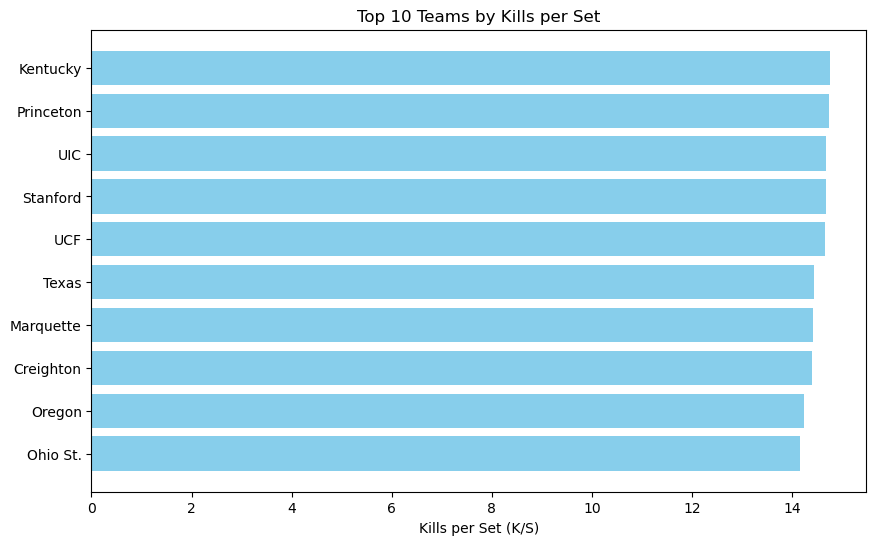

In [8]:
# Top 10 by Kills per Set
kills_top10 = vb[['Team', 'kills_per_set']].sort_values(by='kills_per_set', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(kills_top10['Team'], kills_top10['kills_per_set'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Kills per Set (K/S)')
plt.title('Top 10 Teams by Kills per Set')
plt.show()


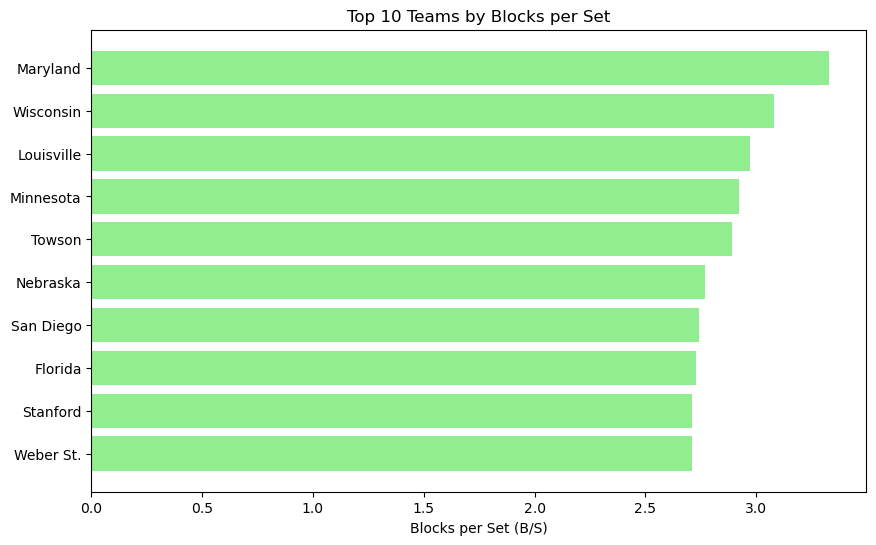

In [13]:
# Top 10 by Blocks per Set
blocks_top10 = vb[['Team', 'blocks_per_set']].sort_values(by='blocks_per_set', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(blocks_top10['Team'], blocks_top10['blocks_per_set'], color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel('Blocks per Set (B/S)')
plt.title('Top 10 Teams by Blocks per Set')
plt.show()

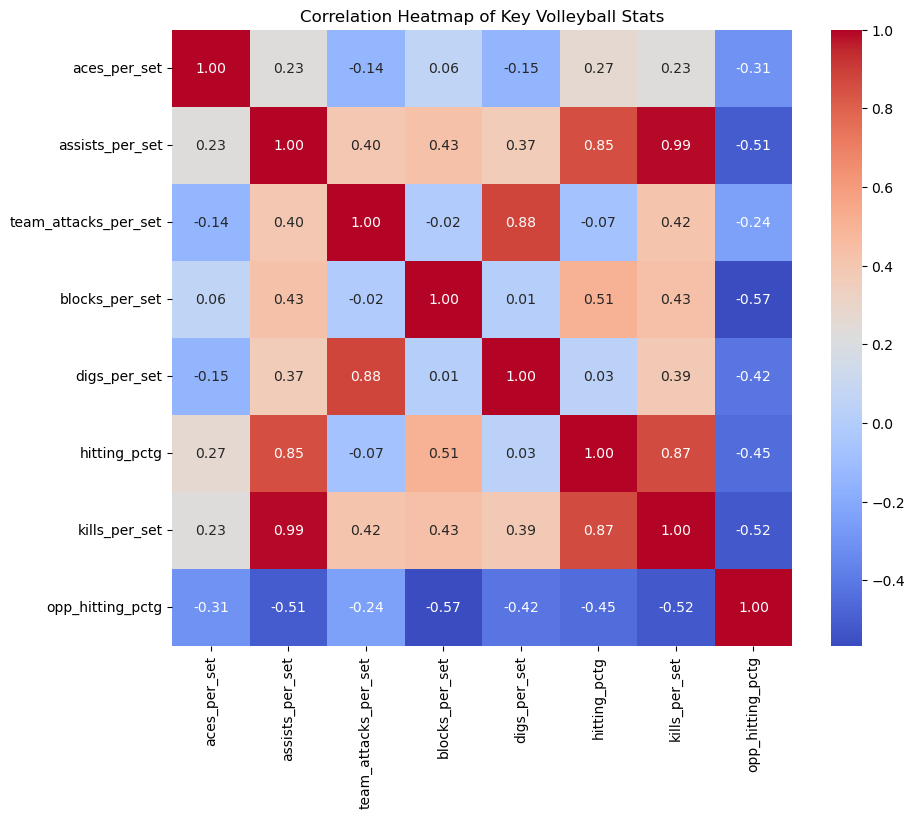

In [15]:
# Sort by win-loss percentage
vb.sort_values(by='win_loss_pctg', ascending=False, inplace=True)

# Important numeric columns
stats_cols = [
    'aces_per_set',
    'assists_per_set',
    'team_attacks_per_set',
    'blocks_per_set',
    'digs_per_set',
    'hitting_pctg',
    'kills_per_set',
    'opp_hitting_pctg'
]

# Correlation matrix
corr_matrix = vb[stats_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Volleyball Stats')
plt.show()

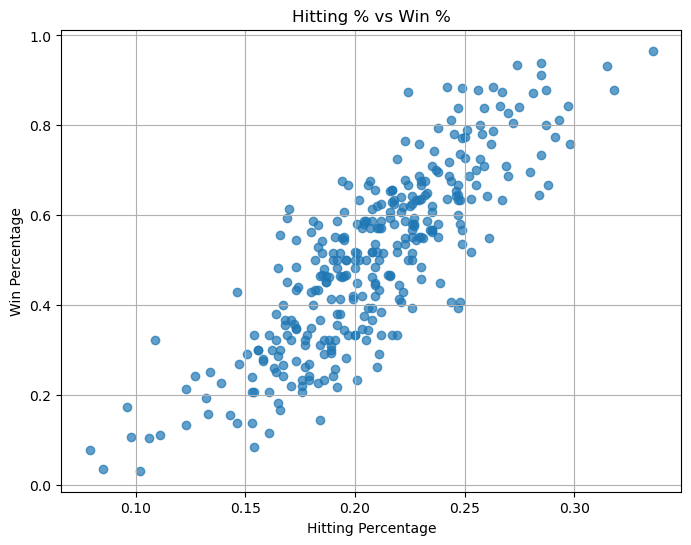

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(vb['hitting_pctg'], vb['win_loss_pctg'], alpha=0.7)
plt.xlabel('Hitting Percentage')
plt.ylabel('Win Percentage')
plt.title('Hitting % vs Win %')
plt.grid(True)
plt.show()

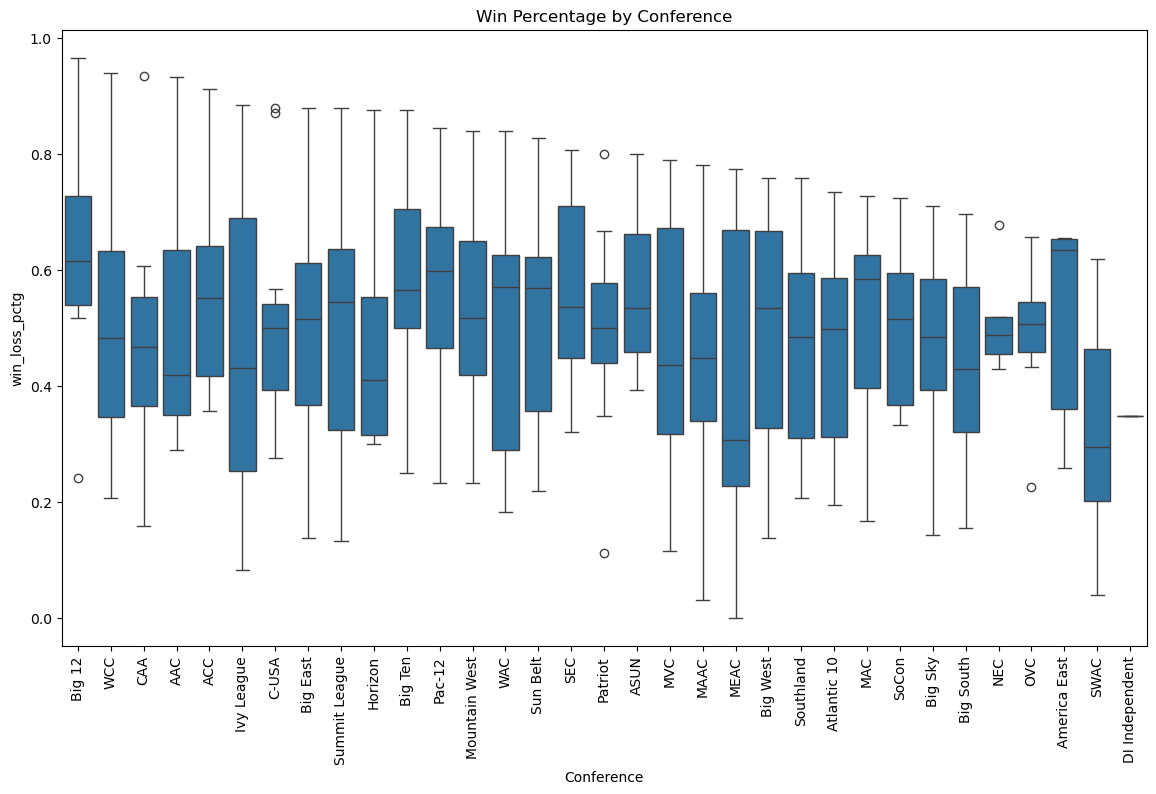

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Conference', y='win_loss_pctg', data=vb)
plt.xticks(rotation=90)
plt.title('Win Percentage by Conference')
plt.show()

# Figuring out which teams are most dominant

/var/folders/xj/9k1vk1y543g0n6yx1n3b9zxw0000gn/T/ipykernel_34301/904605372.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dominance_score', y='Team', data=top10_dominant, palette='viridis')


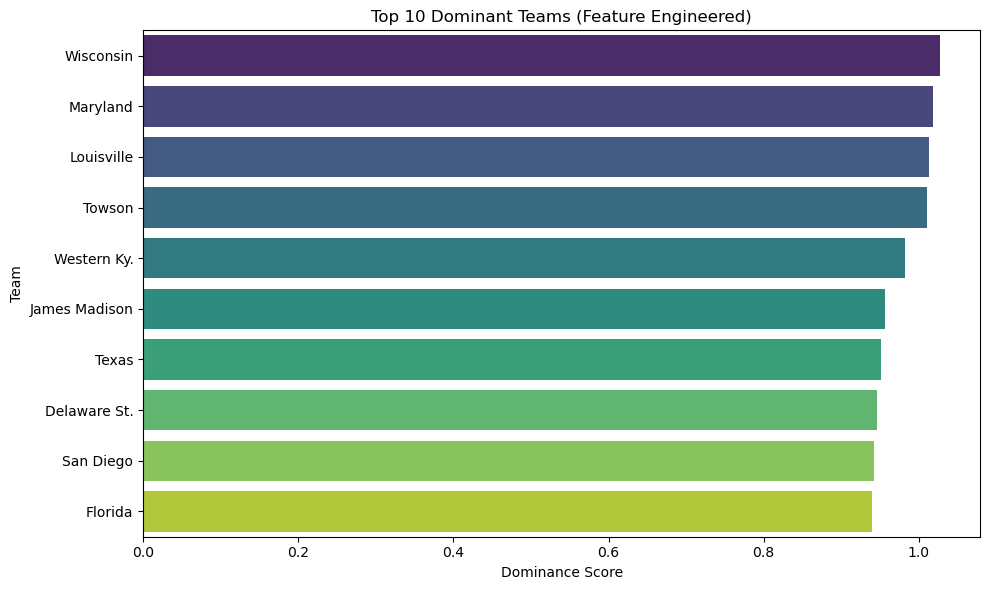

In [14]:
# Sort by win-loss percentage
vb.sort_values(by='win_loss_pctg', ascending=False, inplace=True)

# Create a 'Dominance Score'
vb['dominance_score'] = (
    vb['hitting_pctg'] * 0.4 +
    vb['blocks_per_set'] * 0.2 +
    vb['aces_per_set'] * 0.2 -
    vb['opp_hitting_pctg'] * 0.2
)

# Sort by dominance score
vb.sort_values(by='dominance_score', ascending=False, inplace=True)

# Show Top 10 Dominant Teams
top10_dominant = vb[['Team', 'dominance_score']].head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='dominance_score', y='Team', data=top10_dominant, palette='viridis')
plt.xlabel('Dominance Score')
plt.title('Top 10 Dominant Teams (Feature Engineered)')
plt.tight_layout()
plt.show()

## Top 10 vs bottom 10 comparison

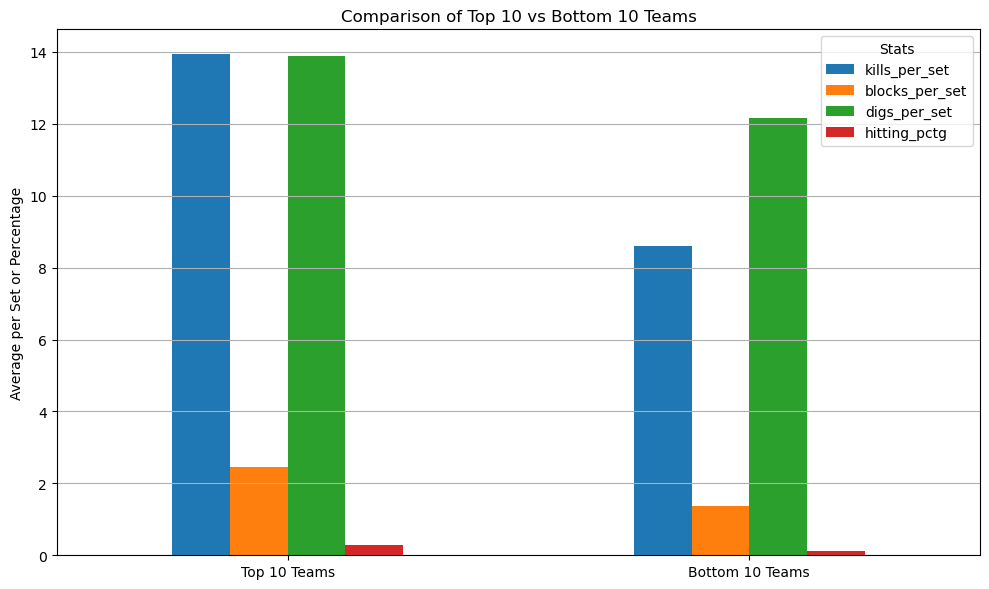

In [20]:
vb.sort_values(by='win_loss_pctg', ascending=False, inplace=True)

# Get Top 10 and Bottom 10 teams
top_10 = vb.head(10)
bottom_10 = vb.tail(10)

# Calculate mean stats for Top 10 and Bottom 10
top_means = top_10[['kills_per_set', 'blocks_per_set', 'digs_per_set', 'hitting_pctg']].mean()
bottom_means = bottom_10[['kills_per_set', 'blocks_per_set', 'digs_per_set', 'hitting_pctg']].mean()

# Combine for comparison
comparison_df = pd.DataFrame({
    'Top 10 Teams': top_means,
    'Bottom 10 Teams': bottom_means
})

# Transpose for plotting
comparison_df = comparison_df.T

# Plot
comparison_df.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Top 10 vs Bottom 10 Teams')
plt.ylabel('Average per Set or Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Stats')
plt.tight_layout()
plt.show()